# SQL PROJECT

## About Project

Now we have finished **SQL** part of the our course project. And then we are going to make ***python*** part of our project.(`Step 4` and `Step 5`)

## Project plan

1. **Step 4**. ***Exploratory data analysis***
2. **Step 5**. ***Testing hypotheses***
3. **General Conclusion**

### Step 4. Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
companies = pd.read_csv('/datasets/project_sql_result_01.csv')
print(companies.info())
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


On the above we have opened data about companies' trips(number of rides) which have been made on `15-16 November 2017` by `read_csv()` method. And then we've looked general information for this data. 

In [2]:
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
print(dropoff.info())
dropoff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Here we have opened data about dropoff locations and their average number for `November`. Then we've looked general information of data by `info()` method.

In [3]:
print('TOP 10 DROPOFF NEIGHBORHOODS')
dropoff10 = dropoff.sort_values('average_trips',ascending=False).head(10)
print(dropoff10)

TOP 10 DROPOFF NEIGHBORHOODS
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Here we have found 10 top dropoff locations by their `average_trips`. For reach this results we have used `sort_values()` method giving `ascending` parameter as *False*. Then we saved result on `dropoff10` dataframe for further usings.

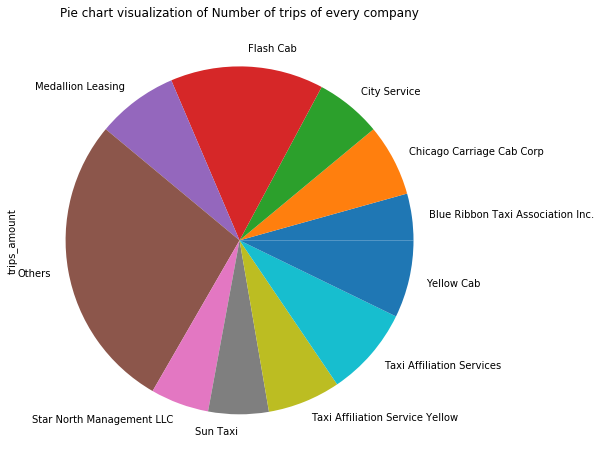

In [4]:
companies10 = companies.head(10).set_index('company_name')
companies['company_name'] = companies['company_name'].where(companies['company_name'].isin(companies10.index),'Others')
finalcompanies = companies.groupby('company_name')['trips_amount'].sum()
finalcompanies.plot(y='trips_amount',x='company_name',kind='pie',grid=True,figsize=(8,8))
plt.title('Pie chart visualization of Number of trips of every company')
plt.show()



Text(0.5, 0, 'Dropoff Locations')

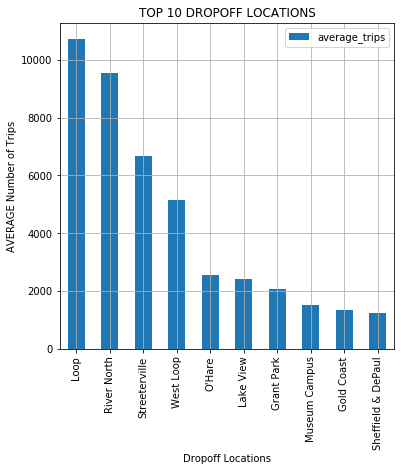

In [5]:
dropoff10.plot(y='average_trips',x='dropoff_location_name',kind='bar',grid=True,figsize=(6,6))
plt.title('TOP 10 DROPOFF LOCATIONS') 
plt.ylabel('AVERAGE Number of Trips')
plt.xlabel("Dropoff Locations")

Here we have plotted bar graph and pie chart for both dataframes by using `plot()` method. And then for modifying graphs we used `plt.title()`,`plt.xlabel()`,`plt.ylabel` methods.On 1st group we took 10 companies and give grouped others into `Others`. As wee see Number of trips made on `15-16 November 2017` leading `Flash Cab` company and this companies number of trips at least around **1.5** bigger than others. And let's talk about 2nd graph: leading location is `Loop`. And we can clearly see that on this graph first 2 locations, last 3 locations average rides on `November 2017` is close each other.

### Conclusion

On this step firstly we have opened the data. Then we look general information about data. As wee see above both of them have correct datatypes and there is no missing value. Then we have stored top10 dropoff locations on `dropoff10`. Then we plotted bar graphs both of them(2nd one `dropoff10`). As wee see both graphs slightly decreasing(because they're sorted on decreasing order) and 1st graph seems like a fastly decreasing(this can be explained there is more values than 2nd graph(which has an only 10 values) and bigger size)

### Step 5. Testing hypotheses

Our hypothesis is:

`"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."`

`null` hypothesis states that `mean of the population in question equals A` and `alternative` states that `The mean of the population does not equal A`. So, We will use `st.ttest_ind()` method for testing hypotheses. From hypothesis above we can see that our hypothesis is `alternative` hypothesis. Before checking hypothese we will apply `Levene`'s test for checking equal variance. And our null hypothesis will be:

`"The average duration of rides from the Loop to O'Hare International Airport not changes on rainy Saturdays."`

In [6]:
hypotheses_data = pd.read_csv('/datasets/project_sql_result_07.csv')
print(hypotheses_data.info())
hypotheses_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [7]:
rainy = hypotheses_data.query('weather_conditions == "Bad"')
rainy.head()

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0


In [8]:
sunny = hypotheses_data.query('weather_conditions == "Good"')
sunny.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


On the previous cells we have opened data firstly. Then we sliced our data into 2 slices, which are `sunny` and `rainy` by using `query()` method.Then we printed first rows of our data.

In [9]:
alpha = .05
levene_test = st.levene(rainy['duration_seconds'],sunny['duration_seconds'])
print(levene_test)
result1a = st.ttest_ind(rainy['duration_seconds'],sunny['duration_seconds'])
print('p-value of hypothesis:',result1a.pvalue)
if(result1a.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)
p-value of hypothesis: 6.517970327099473e-12
We reject the null hypothesis


### Conclusion

We take a significance level as `.05`. And `p-value` stands  probability of any value chosen randomly from sample space will be equal or around `mean`. We set alpha as `.05` to get best subset of the data. And if `p-value` less than `alpha` we will reject hypotheses, else we will accept the hypotheses. And we did not specify `equal_var` parameter.Because by default it is `True`.Reason of this since the p-values of the Leven test turned out to be more than **5%**. 

## General Conclusion

We have made lots of calculatons.We observed that `Flash Cab` company was leading on number of trips on `15-16th November 2017`.And we can prefer partnership on ads top5 companies for next 2 days(We know that in real industry there will be more factors which will affect and only 2 days will not be enough we are concluding according to data which we had).Then we have found **TOP 10** dropoff locations on `November` and here we leading `Loop` neighborhood which we considered in our hypothese and sql task.Also, O'Hare were on top 5 (5th).And let's turn to hypothese we rejected  `null` hypothesis. This means we can not prove or disprove the hypothese is correct or not correct.It seems like `alternative` must be true. Only thing that we can say that we fail to reject or rejected hypotheses.